In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import io
from google.colab import files
sns.set_style("whitegrid")
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
uploaded = files.upload()

Saving yhat2.csv to yhat2.csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['yhat2.csv']))
df1.head()

,Dates_,Hotel,Food,Beverage,F&B,Spa,REVENUE,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA,Date,y_hat,yhat1
0,2016-01-01,92261.180204,75081.284922,60255.705116,135336.99000,0.0,227598.1702,35498.871005,0.0,0.0,90952.0,0.0,101147.511981,2016-01-01,90605.816266,88632.370626
1,2016-02-01,71652.459665,67013.831684,51465.260916,118479.09260,0.0,190131.5523,32004.993231,0.0,0.0,92950.0,0.0,65176.852916,2016-02-01,66728.379852,63972.011076
2,2016-03-01,82218.545266,68057.925466,54043.365802,122101.29130,0.0,204319.8365,33577.743298,0.0,0.0,96491.0,0.0,74251.048211,2016-03-01,73889.523120,71804.726212
3,2016-04-01,82267.407633,49679.356863,45048.526943,94727.88381,0.0,176995.2914,27772.245171,0.0,0.0,96904.0,0.0,52318.700007,2016-04-01,52994.450854,52189.748714
4,2016-05-01,64418.259843,46240.111203,39537.548435,85777.65964,0.0,150195.9195,27132.957779,0.0,0.0,95536.0,0.0,27527.099200,2016-05-01,34886.526818,33190.904229


In [ ]:
df1.set_index('Dates_', inplace=True)
df1.head()

,Hotel,Food,Beverage,F&B,Spa,REVENUE,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA,Date,y_hat,yhat1
Dates_,,,,,,,,,,,,,,,
2016-01-01,92261.180204,75081.284922,60255.705116,135336.99000,0.0,227598.1702,35498.871005,0.0,0.0,90952.0,0.0,101147.511981,2016-01-01,90605.816266,88632.370626
2016-02-01,71652.459665,67013.831684,51465.260916,118479.09260,0.0,190131.5523,32004.993231,0.0,0.0,92950.0,0.0,65176.852916,2016-02-01,66728.379852,63972.011076
2016-03-01,82218.545266,68057.925466,54043.365802,122101.29130,0.0,204319.8365,33577.743298,0.0,0.0,96491.0,0.0,74251.048211,2016-03-01,73889.523120,71804.726212
2016-04-01,82267.407633,49679.356863,45048.526943,94727.88381,0.0,176995.2914,27772.245171,0.0,0.0,96904.0,0.0,52318.700007,2016-04-01,52994.450854,52189.748714
2016-05-01,64418.259843,46240.111203,39537.548435,85777.65964,0.0,150195.9195,27132.957779,0.0,0.0,95536.0,0.0,27527.099200,2016-05-01,34886.526818,33190.904229


In [ ]:
df1.index = pd.to_datetime(df1.index)
df1.head()

,Hotel,Food,Beverage,F&B,Spa,REVENUE,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA,Date,y_hat,yhat1
Dates_,,,,,,,,,,,,,,,
2016-01-01,92261.180204,75081.284922,60255.705116,135336.99000,0.0,227598.1702,35498.871005,0.0,0.0,90952.0,0.0,101147.511981,2016-01-01,90605.816266,88632.370626
2016-02-01,71652.459665,67013.831684,51465.260916,118479.09260,0.0,190131.5523,32004.993231,0.0,0.0,92950.0,0.0,65176.852916,2016-02-01,66728.379852,63972.011076
2016-03-01,82218.545266,68057.925466,54043.365802,122101.29130,0.0,204319.8365,33577.743298,0.0,0.0,96491.0,0.0,74251.048211,2016-03-01,73889.523120,71804.726212
2016-04-01,82267.407633,49679.356863,45048.526943,94727.88381,0.0,176995.2914,27772.245171,0.0,0.0,96904.0,0.0,52318.700007,2016-04-01,52994.450854,52189.748714
2016-05-01,64418.259843,46240.111203,39537.548435,85777.65964,0.0,150195.9195,27132.957779,0.0,0.0,95536.0,0.0,27527.099200,2016-05-01,34886.526818,33190.904229


In [ ]:
df1.columns

Index(['Hotel', 'Food', 'Beverage', 'F&B', 'Spa', 'REVENUE', 'COS  (gross)',
       'OpExp', 'FixExp', 'Op+Fix_Exp', 'CorpExp', 'EBITDA', 'Date', 'y_hat',
       'yhat1'],
      dtype='object')

Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3


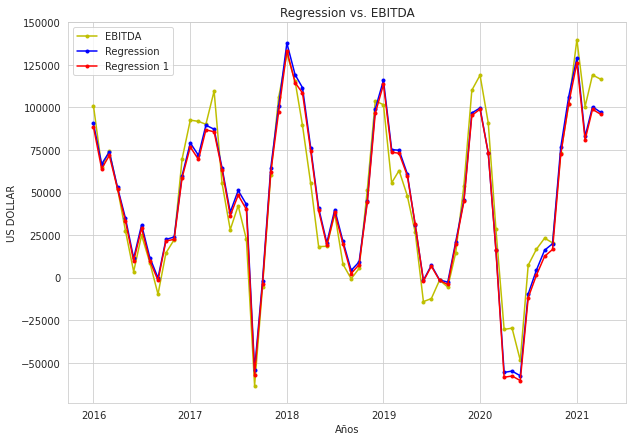

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Regression vs. EBITDA')

plt.xlabel('Años')
plt.ylabel('US DOLLAR')
plt.plot(df1.EBITDA, 'y.-', label='EBITDA')
plt.plot(df1.y_hat, 'b.-', label='Regression')
plt.plot(df1.yhat1, 'r.-', label='Regression 1')
plt.legend()
plt.show()

In [ ]:
y_data = df1['EBITDA']
x_data = df1[['Hotel', 'F&B', 'COS  (gross)']]

**Train test split**


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=3)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 22
number of training samples: 42


In [ ]:
x_train.head()

,Hotel,F&B,COS (gross)
Dates_,,,
2018-11-01,78676.000000,98379.0000,34463.323300
2017-05-01,86373.129000,113733.7741,35298.534500
2017-04-01,95544.448500,133662.0339,37748.046400
2019-01-01,104771.913800,169854.2417,47998.000000
2016-12-01,82124.540798,100940.7351,27571.157085


In [ ]:
x_test.head()

,Hotel,F&B,COS (gross)
Dates_,,,
2016-07-01,59663.130752,81608.35458,25026.665141
2020-08-01,38013.000000,77370.00000,32252.997900
2020-03-01,65495.000000,64686.00000,24598.846600
2021-01-01,110458.000000,198291.00000,61832.000000
2020-01-01,113395.000000,152661.00000,49573.682200


**Regresión Multilineal Metodo Train test split** 

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.intercept_

-54514.805940444385

In [ ]:
lr.coef_

array([ 0.6039252 ,  1.02024285, -1.42675726])

Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3

In [ ]:
lr.score(x_test, y_test)

0.9178560818111453

In [ ]:
lr.predict(x_test)

array([ 29070.62656052,   1361.19328716,  15938.12129383, 126279.28441165,
        98988.97532939,  97496.01141222,  19856.53151319,  96551.52308104,
       114608.92147984,  69415.82804106,  39445.49317842,  76786.30528709,
        72493.5274502 ,  44725.43558266,  33190.90422893,  73679.72049429,
        21543.67673961,  48477.39865339,  80990.52999951, -60571.5189146 ,
       -57894.47861194,  95375.75697695])

In [ ]:
yhat1 = lr.predict(x_data)
yhat1[0:10]

array([88632.37062621, 63972.0110764 , 71804.72621237, 52189.74871409,
       33190.90422893,  9782.36318093, 29070.62656052,  9855.15133672,
       -1668.60264928, 21543.67673961])

In [ ]:
df1.head()

,Hotel,Food,Beverage,F&B,Spa,REVENUE,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA,Date,y_hat,yhat1
Dates_,,,,,,,,,,,,,,,
2016-01-01,92261.180204,75081.284922,60255.705116,135336.99000,0.0,227598.1702,35498.871005,0.0,0.0,90952.0,0.0,101147.511981,2016-01-01,90605.816266,88632.370626
2016-02-01,71652.459665,67013.831684,51465.260916,118479.09260,0.0,190131.5523,32004.993231,0.0,0.0,92950.0,0.0,65176.852916,2016-02-01,66728.379852,63972.011076
2016-03-01,82218.545266,68057.925466,54043.365802,122101.29130,0.0,204319.8365,33577.743298,0.0,0.0,96491.0,0.0,74251.048211,2016-03-01,73889.523120,71804.726212
2016-04-01,82267.407633,49679.356863,45048.526943,94727.88381,0.0,176995.2914,27772.245171,0.0,0.0,96904.0,0.0,52318.700007,2016-04-01,52994.450854,52189.748714
2016-05-01,64418.259843,46240.111203,39537.548435,85777.65964,0.0,150195.9195,27132.957779,0.0,0.0,95536.0,0.0,27527.099200,2016-05-01,34886.526818,33190.904229


In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('EBITDA')

    plt.legend()
    plt.show()
    plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



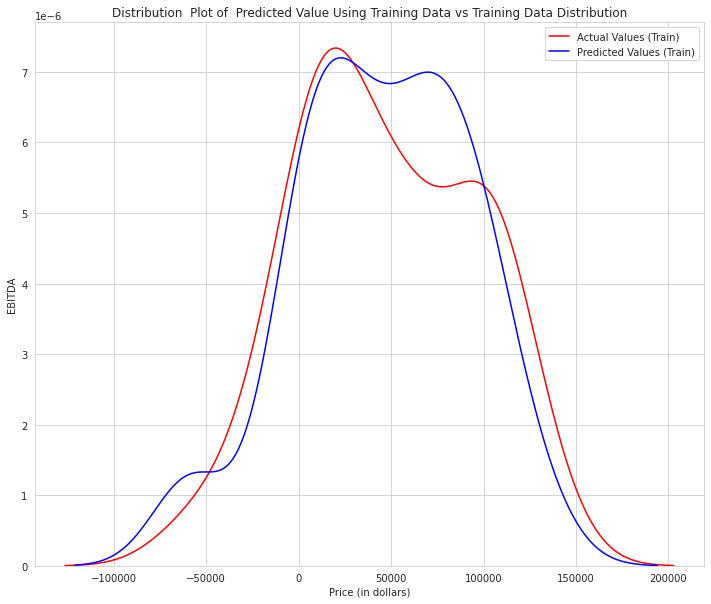

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_data, yhat1, "Actual Values (Train)", "Predicted Values (Train)", Title)
plt.show()

In [ ]:
box = df1[['EBITDA', 'yhat1']]

In [ ]:
box.describe()

,EBITDA,yhat1
count,64.000000,64.000000
mean,46969.470445,45001.213862
std,48176.130970,46312.817509
min,-63478.588200,-60571.518915
25%,13049.340906,11845.207100
50%,45199.101300,44462.361808
75%,91168.809725,77837.361465
max,139931.000000,133469.609961


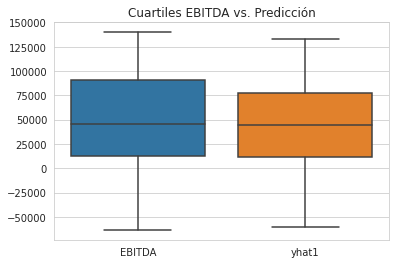

In [ ]:
sns.boxplot(data=box).set(title= 'Cuartiles EBITDA vs. Predicción')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



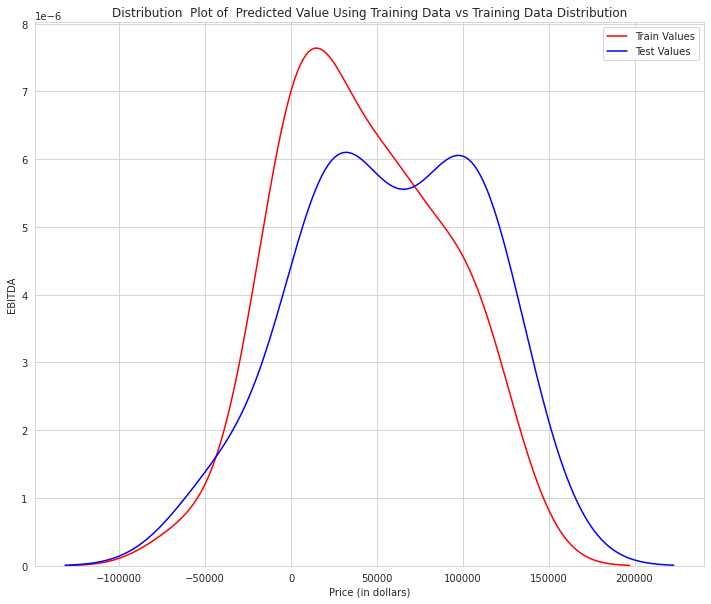

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, y_test, "Train Values", "Test Values", Title)
plt.show()

In [ ]:
corr_predict = df1[['EBITDA', 'y_hat', 'yhat1']]
corr_predict.corr()

,EBITDA,y_hat,yhat1
EBITDA,1.000000,0.965706,0.965462
y_hat,0.965706,1.000000,0.999747
yhat1,0.965462,0.999747,1.000000


In [ ]:
pearson_coef, p_value = stats.pearsonr(df1['EBITDA'], df1['yhat1'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9654615209218957  with a P-value of P = 6.361590210357176e-38


In [ ]:
pearson_coef, p_value = stats.pearsonr(df1['EBITDA'], df1['y_hat'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9657058167762496  with a P-value of P = 5.123510784551663e-38


In [ ]:
pearson_coef, p_value = stats.pearsonr(df1['EBITDA'], df1['COS  (gross)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.861965589788533  with a P-value of P = 5.955456811437811e-20


In [ ]:
pearson_coef, p_value = stats.pearsonr(df1['EBITDA'], df1['OpExp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.2387527246525752  with a P-value of P = 0.0574392393300312


<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>

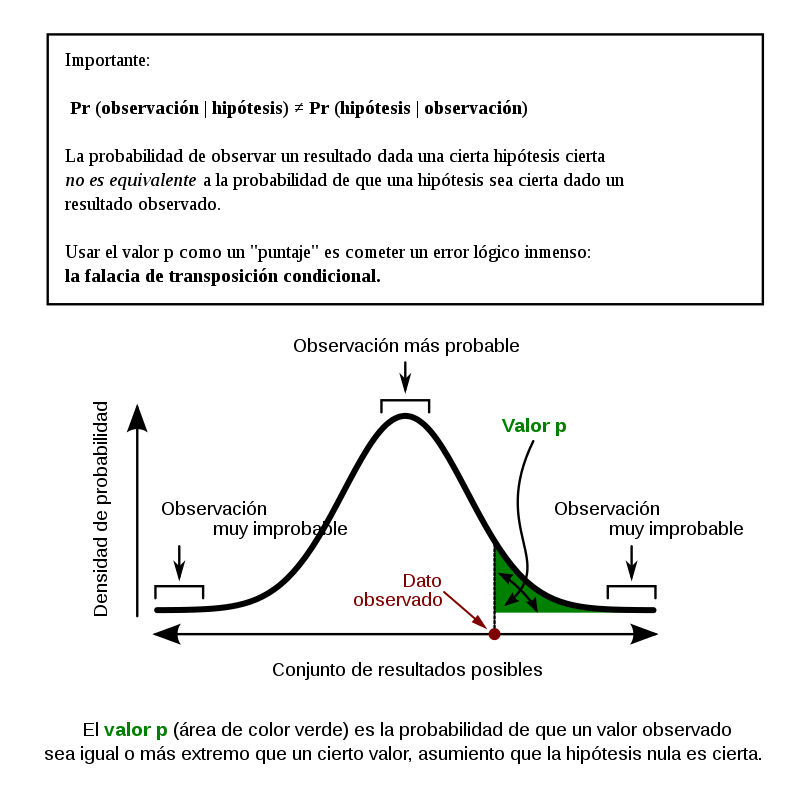

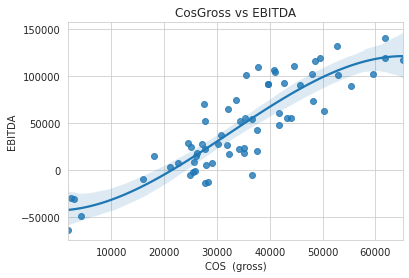

In [ ]:
sns.regplot(data= df1, y=df1['EBITDA'], x=df1['COS  (gross)'], order=3).set(title= 'CosGross vs EBITDA')
plt.show()

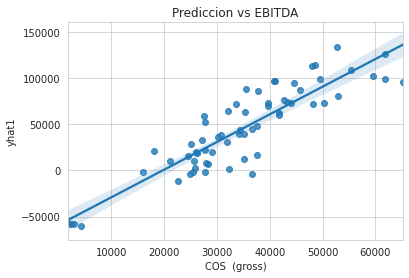

In [ ]:
sns.regplot(data= df1, y=df1['yhat1'], x=df1['COS  (gross)'], order=1).set(title= 'Prediccion vs EBITDA')
plt.show()

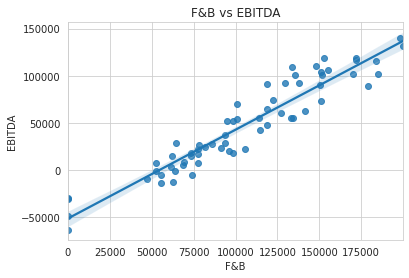

In [ ]:
sns.regplot(data= df1, y=df1['EBITDA'], x=df1['F&B'], order=1).set(title= 'F&B vs EBITDA')
plt.show()

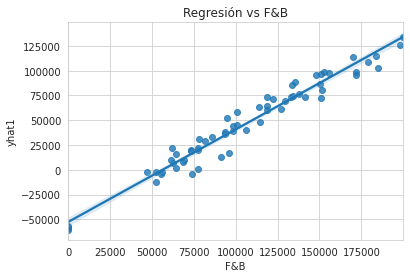

In [ ]:
sns.regplot(data= df1, y=df1['yhat1'], x=df1['F&B'], order=1).set(title= 'Regresión vs F&B')
plt.show()

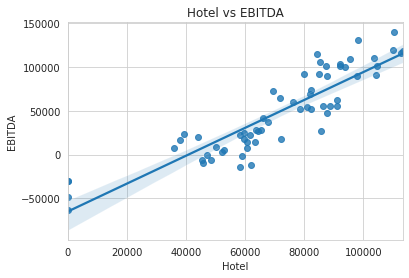

In [ ]:
sns.regplot(data= df1, y=df1['EBITDA'], x=df1['Hotel'], order=1).set(title= 'Hotel vs EBITDA')
plt.show()

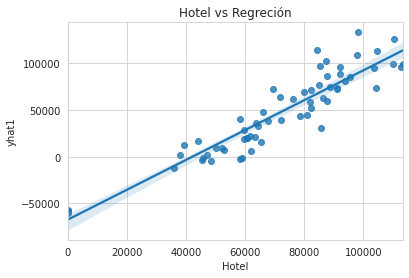

In [ ]:
sns.regplot(data= df1, y=df1['yhat1'], x=df1['Hotel'], order=1).set(title= 'Hotel vs Regreción')
plt.show()

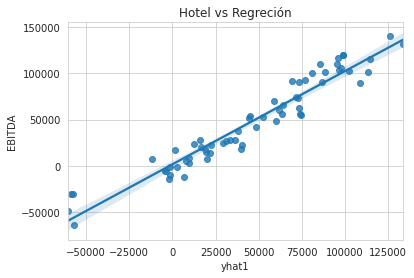

In [ ]:
sns.regplot(data= df1, y=df1['EBITDA'], x=df1['yhat1'], order=1).set(title= 'Hotel vs Regreción')
plt.show()

In [ ]:
x = (df1['EBITDA'] - df1['yhat1'])
x.head()

Dates_
2016-01-01    12515.141355
2016-02-01     1204.841839
2016-03-01     2446.321999
2016-04-01      128.951293
2016-05-01    -5663.805029
dtype: float64

In [ ]:
z = x / df1['EBITDA']

In [ ]:
z.head()

Dates_
2016-01-01    0.123732
2016-02-01    0.018486
2016-03-01    0.032947
2016-04-01    0.002465
2016-05-01   -0.205754
dtype: float64

In [ ]:
dif_por = abs(z)
dif_por

Dates_
2016-01-01    0.123732
2016-02-01    0.018486
2016-03-01    0.032947
2016-04-01    0.002465
2016-05-01    0.205754
                ...   
2020-12-01    0.004448
2021-01-01    0.097560
2021-02-01    0.194469
2021-03-01    0.169670
2021-04-01    0.176712
Length: 64, dtype: float64

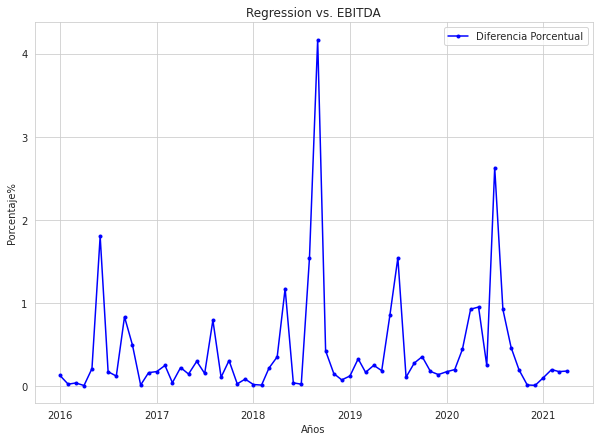

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Regression vs. EBITDA')

plt.xlabel('Años')
plt.ylabel('Porcentaje%')
plt.plot(dif_por, 'b.-', label='Diferencia Porcentual')

plt.legend()
plt.show()

In [ ]:
x2 = (df1['EBITDA'] - df1['y_hat'])
x2.head()

Dates_
2016-01-01    10541.695714
2016-02-01    -1551.526936
2016-03-01      361.525091
2016-04-01     -675.750847
2016-05-01    -7359.427618
dtype: float64

In [ ]:
df1.head()

,Hotel,Food,Beverage,F&B,Spa,REVENUE,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA,Date,y_hat,yhat1
Dates_,,,,,,,,,,,,,,,
2016-01-01,92261.180204,75081.284922,60255.705116,135336.99000,0.0,227598.1702,35498.871005,0.0,0.0,90952.0,0.0,101147.511981,2016-01-01,90605.816266,88632.370626
2016-02-01,71652.459665,67013.831684,51465.260916,118479.09260,0.0,190131.5523,32004.993231,0.0,0.0,92950.0,0.0,65176.852916,2016-02-01,66728.379852,63972.011076
2016-03-01,82218.545266,68057.925466,54043.365802,122101.29130,0.0,204319.8365,33577.743298,0.0,0.0,96491.0,0.0,74251.048211,2016-03-01,73889.523120,71804.726212
2016-04-01,82267.407633,49679.356863,45048.526943,94727.88381,0.0,176995.2914,27772.245171,0.0,0.0,96904.0,0.0,52318.700007,2016-04-01,52994.450854,52189.748714
2016-05-01,64418.259843,46240.111203,39537.548435,85777.65964,0.0,150195.9195,27132.957779,0.0,0.0,95536.0,0.0,27527.099200,2016-05-01,34886.526818,33190.904229


In [ ]:
z2 = x2 / df1['EBITDA']
z2.head()

Dates_
2016-01-01    0.104221
2016-02-01   -0.023805
2016-03-01    0.004869
2016-04-01   -0.012916
2016-05-01   -0.267352
dtype: float64

In [ ]:
dif_por2_m = abs(z2).mean()
dif_por2_m

0.4874733994342581

In [ ]:
dif_por2 = abs(z2)
dif_por2.head()

Dates_
2016-01-01    0.104221
2016-02-01    0.023805
2016-03-01    0.004869
2016-04-01    0.012916
2016-05-01    0.267352
dtype: float64

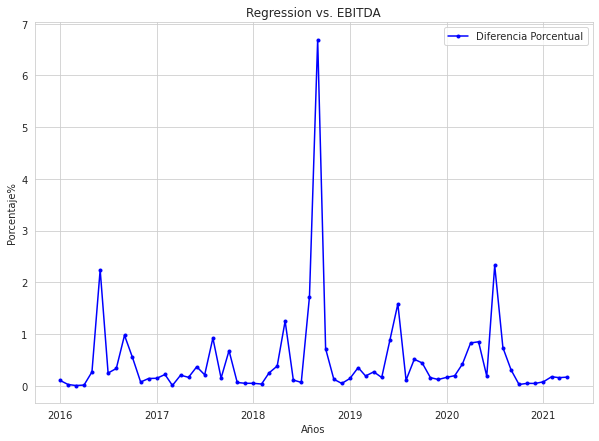

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Regression vs. EBITDA')

plt.xlabel('Años')
plt.ylabel('Porcentaje%')
plt.plot(dif_por2, 'b.-', label='Diferencia Porcentual')
plt.legend()
plt.show()

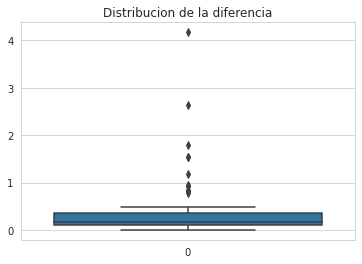

In [ ]:
sns.boxplot(data=dif_por).set(title= 'Distribucion de la diferencia')
plt.show()

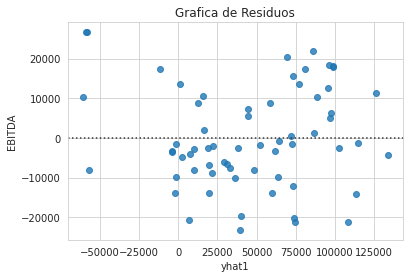

In [ ]:
sns.residplot(data=df1, x=df1['yhat1'], y=df1['EBITDA']).set(title='Grafica de Residuos')
plt.show()

In [ ]:
df1.to_csv('yhat2.csv')

In [ ]:
df2 = pd.DataFrame({'Hotel':[85294,76389,55188,65221,94307,110816],'f&b':[77363,64721,68724,90414,124203,182225],'CossGross':[33878,29774,29349,35200,45981,62472]})
df2

,Hotel,f&b,CossGross
0,85294,77363,33878
1,76389,64721,29774
2,55188,68724,29349
3,65221,90414,35200
4,94307,124203,45981
5,110816,182225,62472


In [ ]:
df2.shape

(6, 3)

In [ ]:
oct = df2.loc[0,['Hotel','f&b','CossGross']]
oct = np.asarray(oct)
oct

array([85294, 77363, 33878])

In [ ]:
oct.shape

(3,)

In [ ]:
oct = oct.reshape(1,3)
oct

array([[85294, 77363, 33878]])

In [ ]:
lr.predict(oct)

array([27589.75552187])

In [ ]:
nov = df2.loc[1,['Hotel','f&b','CossGross']]
nov = np.asarray(nov)
nov

array([76389, 64721, 29774])

In [ ]:
nov = nov.reshape(1,3)
nov

array([[76389, 64721, 29774]])

In [ ]:
lr.predict(nov)

array([15169.3032628])

In [ ]:
dic = df2.loc[2,['Hotel','f&b','CossGross']]
dic = np.asarray(dic)
dic

array([55188, 68724, 29349])

In [ ]:
dic = dic.reshape(1,3)
dic

array([[55188, 68724, 29349]])

In [ ]:
pred_df2 = lr.predict(df2)
pred_df2

array([ 27589.75552187,  15169.3032628 ,   7055.88902388,  26896.1812982 ,
        63553.06541728, 109191.14333739])

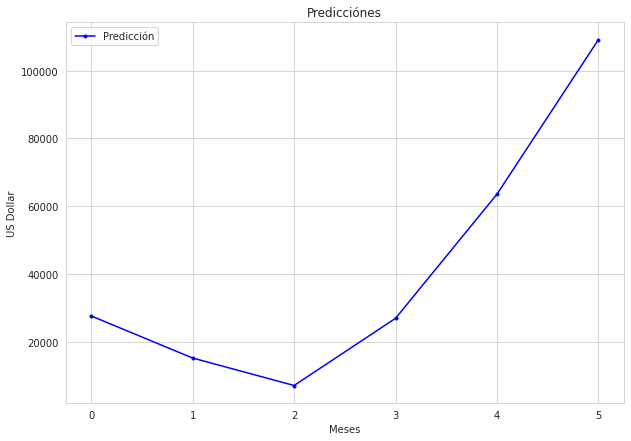

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Predicciónes')

plt.xlabel('Meses')
plt.ylabel('US Dollar')
plt.plot(pred_df2, 'b.-', label='Predicción')
plt.legend()
plt.show()